## Exploratory Data Analysis and Prediction of Chronic Kidney Disease Using Machine Learning Technique



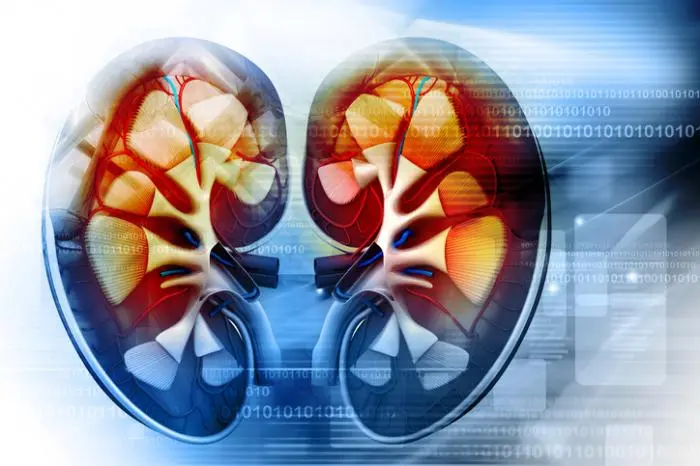

### Background 
Chronic kidney disease (CKD) is a type of kidney disease in which there is gradual loss of kidney function over a period of months to years.  Initially, there are generally no symptoms; later, symptoms may include leg swelling, feeling tired, vomiting, loss of appetite, and confusion, [source](https://en.wikipedia.org/wiki/Chronic_kidney_disease) 

The human kidney is involved in multiple key functions of the body system which Includes:

- They help to regulate and filter minerals from blood<br>
- They help to maintain overall fluid balance<br>
- They help to filter wastes that are generated from medications, food and toxic substances <br>
- They also help in creating hormones that help produce red blood cells, promote bone health, and regulate blood pressure

#### So what happens if the kidney is damaged?
Human have two kidneys. If for any reason one doesn't function as expected, the burdens automatically get carried over to the second kidney. If the patient fails to take adequate and timely measures to improve his/her condition, there is every likelihood that both kidneys will fail, leading to acute renal failure. This can be fatal without artificial filtering (dialysis) or a kidney transplant.However, this usuaally occur at the advance stage of chronic kidney disease and symptoms will only show up at a severe stage which often call urget medical attendant.

### Project Overview 
The objective of this project is to write a standard code that can be used across biomedical data science project. The dataset used for the proof of concept can help physicians to get better understanding of of Chronic Kidney Disease (CKD) using various measurements and biomakers.
The dataset used for this project can be found [here](https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease)

Specifically, the project will help physicians have an in-depth understanding of of:
- Risk factors for Chronic Kidney Disease
- Potential Chronic Kidney Disease sub-types  

### Data Dictionary
The dataset have 25 columns as detailed below.<br>
- `age` - age <br>
- `bp` - blood pressure<br>
- `sg` - specific gravity<br>
- `al` - albumin<br>
- `su` - sugar<br>
- `rbc` - red blood cells<br>
-  `pc` - pus cell<br>
- `pcc` - pus cell clumps<br>
-  `ba` - bacteria<br>
- `bgr` - blood glucose random<br>
- `bu` - blood urea<br>
- `sc` - serum creatinine<br>
- `sod` - sodium<br>
- `pot` - potassium<br>
- `hemo` - hemoglobin <br>
- `pcv` - packed cell volume <br>
- `wc` - white blood cell count <br>
- `rc` - red blood cell count <br>
-  `htn` - hypertension <br>
- `dm` - diabetes mellitus <br>
- `cad` - coronary artery disease <br>
- `appet` - appetite <br>
- `pe` - pedal edema <br>
- `ane` - anemia <br>
- `classification` - class



In [2]:
# Import the needed libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set_theme()
import scipy.stats
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")


%matplotlib inline

In [3]:
# Read in the CSV file
ckd_df = pd.read_csv("chronic_kidney_disease.csv", sep=",", header=0,index_col=0)

In [4]:
# View the first 5 records
ckd_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


### Exploratory data analysis (EDA)
It is a good practice to explore the dataset in order to have a better understanding of it.

In [5]:
# Check for number of rows and columns
ckd_df.shape

(400, 25)

It can be observed that the dataset have 400 records with 25 columns. Some of these columns have null values.

In [6]:
#  Get more info about the data.
ckd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [7]:
# View the statistical distribution of the datatset
ckd_df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


I can be depicted from above that the the patients's `minimum age` is `2`, while the `maximum age` is `90`. Also, `50%` of the patients are above `50 years` of age. The average `blood pressure` is `76.5`.

### Check for NULL values

In [8]:
# Check for null values in the dataset
ckd_df.isnull().sum().sort_values(ascending=False)

rbc               152
rc                130
wc                105
pot                88
sod                87
pcv                70
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

All the columns have at least a null value with the exception of the classification column. The `rbc` have the highest number of null values which is `152` follow by `rc` with `130` and `wc` with `105`. These null values calls for serious data cleaning.

### Data cleaning 
Exploring the dataset further revealed that there are some features ['pcv','wc','rc','dm','cad','classification'] that contains some special character, thus, the need to replace them with appropriate values.

In [9]:
# Check for special characters 
ckd_df['dm'].unique()

array(['yes', 'no', ' yes', '\tno', '\tyes', nan], dtype=object)

In [10]:
# cleaning 'PCV'
ckd_df['pcv']=ckd_df['pcv'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\t43','43').replace('\t?','Nan'))

# cleaning "WC"
ckd_df['wc']=ckd_df['wc'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\t?','Nan').replace('\t6200','6200').replace('\t8400','8400'))

# cleaning "RC"
ckd_df['rc']=ckd_df['rc'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\t?','Nan'))

# cleaning "dm"
ckd_df['dm']=ckd_df['dm'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\tno','no').replace('\tyes','yes').replace(' yes','yes'))

# cleaning "CAD"
ckd_df['cad']=ckd_df['cad'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\tno','no'))

# cleaning "Classification"
ckd_df['classification']=ckd_df['classification'].apply(lambda x:x if type(x)==type(3.5) else x.replace('ckd\t','ckd'))


In [11]:
ckd_df['dm'].head()

id
0    yes
1     no
2    yes
3     no
4     no
Name: dm, dtype: object

The special characters has been corrected, however, there is need to still work on the NaN values.

In [12]:
ckd_df['dm'].unique()

array(['yes', 'no', nan], dtype=object)

In [13]:
ckd_df = ckd_df.dropna(axis=0)
ckd_df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [14]:
ckd_df.dm.unique()

array(['no', 'yes'], dtype=object)

All the NaN values has been dealt with. The next thing is to replace all positive data scuh as; `normal`, `positive`, `True`, `yes` with `1` and all negative data such as ; `abnormal`, `negative`, `false`, `no` with `0`.

In [15]:
ckd_df['rbc'] = ckd_df.rbc.replace(['normal', 'abnormal'], ['1', '0'])
ckd_df['pc'] = ckd_df.pc.replace(['normal', 'abnormal'], ['1', '0'])
ckd_df['pcc'] = ckd_df.pcc.replace(['present', 'notpresent'], ['1', '0'])
ckd_df['ba'] = ckd_df.ba.replace(['present','notpresent'], ['1', '0'])
ckd_df['htn'] = ckd_df.htn.replace(['yes','no'], ['1', '0'])

ckd_df['dm'] = ckd_df.dm.replace(['yes','no'], ['1', '0'])
ckd_df['cad'] = ckd_df.cad.replace(['yes','no'], ['1', '0'])
ckd_df['appet'] = ckd_df.appet.replace(['good','poor'], ['1', '0'])
ckd_df['pe'] = ckd_df.pe.replace(['yes','no'], ['1', '0'])
ckd_df['ane'] = ckd_df.ane.replace(['yes','no'], ['1', '0'])
ckd_df['classification'] = ckd_df.classification.replace(['ckd','notckd'], ['1', '0'])
ckd_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32,6700,3.9,1,0,0,0,1,1,1
9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,29,12100,3.7,1,1,0,0,0,1,1
11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,...,32,4500,3.8,1,1,0,0,1,0,1
14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,...,16,11000,2.6,1,1,1,0,1,0,1
20,61.0,80.0,1.015,2.0,0.0,0,0,0,0,173.0,...,24,9200,3.2,1,1,1,0,1,1,1


### Heatmap Representation of The Correlations Among All The Variables
There is the heatmap representation correlation between the features in the data.

In [16]:
corr = ckd_df.corr()
corr.style.background_gradient(cmap='RdBu_r')

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
age,1.000000,0.079712,-0.277303,0.253380,0.207711,0.301915,0.190636,0.189721,-0.102933,0.006866,-0.245645
bp,0.079712,1.000000,-0.198897,0.322507,0.243828,0.190113,0.316287,0.386551,-0.224710,0.127801,-0.282365
sg,-0.277303,-0.198897,1.000000,-0.712331,-0.448477,-0.544781,-0.545319,-0.563122,0.539285,-0.075057,0.682086
al,0.253380,0.322507,-0.712331,1.000000,0.521448,0.518123,0.661940,0.702889,-0.599334,0.209492,-0.784745
su,0.207711,0.243828,-0.448477,0.521448,1.000000,0.730050,0.312259,0.347196,-0.242491,0.271954,-0.385511
bgr,0.301915,0.190113,-0.544781,0.518123,0.730050,1.000000,0.326496,0.331284,-0.284968,0.102226,-0.434158
bu,0.190636,0.316287,-0.545319,0.661940,0.312259,0.326496,1.000000,0.896094,-0.492778,0.245427,-0.712196
sc,0.189721,0.386551,-0.563122,0.702889,0.347196,0.331284,0.896094,1.000000,-0.532575,0.141896,-0.723937
sod,-0.102933,-0.224710,0.539285,-0.599334,-0.242491,-0.284968,-0.492778,-0.532575,1.000000,-0.051037,0.583001
pot,0.006866,0.127801,-0.075057,0.209492,0.271954,0.102226,0.245427,0.141896,-0.051037,1.000000,-0.192100


An absolute value of 0.5 can be considered to be significant, since this have to do with health.


### Number of classes presence in the datase

In [17]:
ckd_df['classification'].value_counts().reset_index()

,index,classification
0,0,115
1,1,43


Text(0, 0.5, 'Counts')

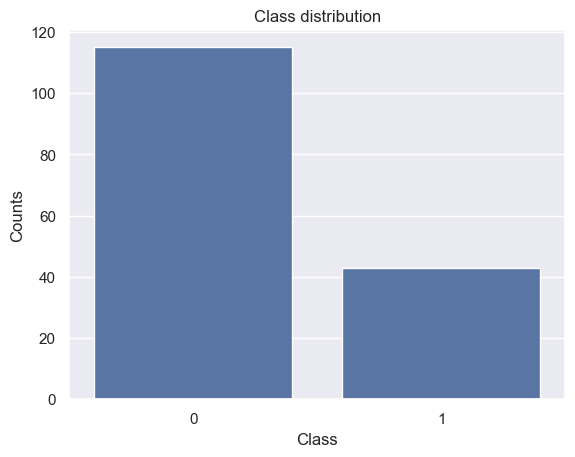

In [18]:
# check for diabetes class distribution
base_color = sns.color_palette()[0]
base_order = ckd_df['classification'].value_counts().index
sns.countplot(x='classification', data=ckd_df,  color=base_color, order=base_order)
plt.title('Class distribution')
plt.xlabel('Class')
plt.ylabel("Counts")

### Model building and training
Logistics regression algorithm will be used to make prediction 

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size = 0.3)

NameError: name 'X' is not defined

In [ ]:
# Create Logistic Regression classifer object
logreg = LogisticRegression()
# Train the classifer
logreg.fit(X_train , y_train)
# Test the model on a new data
y_pred = logreg.predict(X_test)
# Test the model accuracy (i.e, how often is the classifier correct?)
lr_accuracy =  metrics.accuracy_score(y_test,y_pred)

#  Evaluate model performance
print(f'Accuracy: {round(lr_accuracy * 100,2)}%')

Accuracy: 97.92%


In [ ]:
test_pred = logreg.predict(X_test)
train_pred = logreg.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

print('Train Accuracy: ', accuracy_score(y_train, train_pred))
print('Test Accuracy: ', accuracy_score(y_test, test_pred))

Train Accuracy:  1.0
Test Accuracy:  0.9791666666666666


### Confusion Matrix

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[35  0]
 [ 1 12]]


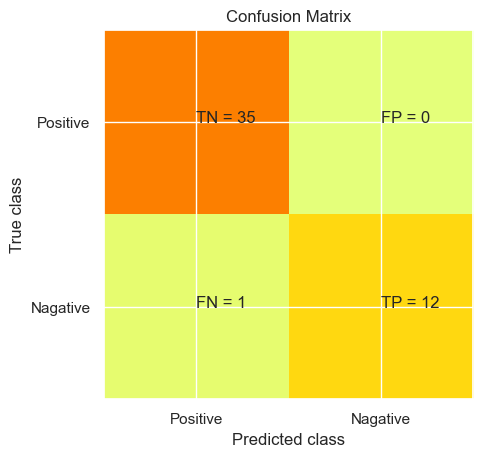

In [ ]:
# Visualise the confusion matrix
plt.clf()
classNames = ["Positive", "Nagative"]
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
plt.title('Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
v = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(v[i][j])+" = "+str(confusion_matrix[i][j]))
plt.show()

The model give an accuracy of 98%.

### Conclusion

After an in-depth analysis of the dataset, the dataset revealed the following
1. There is strong correlation between CKD and the following faetures, as a potential who possess tham have a high likelyhood of having CKD.
  - `rbc` - Red blood cell <br>
  - `pc` - Pus Cell <br>
  - `bgr` - Blood glucose (strong negative correlation)
  - `bu` - Blood urea (strong negative correlation)
  - `pe` - Pedal edema
  - `ane` - Anemia
  - `dm` - Diabetes
  - `cad`- Coronary artery disease
  - `age` - age
  
2. Using Logistics regression algorithm, gives a good prediction performance of 98% accuracy.